# BoomBikes - US Bike-sharing provider

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

##### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


##### Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 
 
### Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


#### Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

- where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
- Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.





## Reading the Data

#### Import requried artifacts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from datetime import datetime # Used to Convert Date and Time


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


#### read the CSV file. 

In [2]:
data = pd.read_csv('day.csv', header = 0, infer_datetime_format = False)

print("Shape of the data:" , data.shape)

data.head()

Shape of the data: (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Analysis

The Given Dataset is of size 730 records and following 16 columns:

- **instant**: record index
- **dteday** : date
- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr** : year (0: 2018, 1:2019)
- **mnth** : month ( 1 to 12)
- **holiday** : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** : 4 various options (Clear, Mist, Light Snow, Heavy Rain)
- **temp** : temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Insights
- The **instant** column holds a sequence of each record. It may not be of interest to our analysis.
- The **dteday** column holds a date information. 
- The **yr** field as per the datadictionary can be enhanced to a map as follows {0: 2018, 1: 2019}.
- The **Weekday** field data is numeric; this is a coded categorical variable. We need to map it to the appropriate DayOfWeek based on the information. 
- Similarly, the **weathersit** field data is numeric; this is a coded categorical variable. We need to map it to the appropriate WeatherSituation based on the information provided in the data dictionary.

### Data Validation & Cleaning

#### Check for Duplicate Records

In [4]:
#### Check for Duplicates
unique_data = data.drop_duplicates(inplace=False)
print(unique_data.shape[0] - data.shape[0], "Duplicate records found in the dataset")

0 Duplicate records found in the dataset


In [5]:
##### Check for Columns having singular values
data.columns.to_series().apply(lambda x: len(data.loc[:, x].unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

__INSIGHT__: The dataset has unique values for all the columns, as respecting the data dictionary.

#### Check for Missing Values in Columns

In [6]:
# Look for Nulls or Missing Data...
data[data.isnull() | data.isna()].sum()

instant       0.0
dteday          0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: object

- The Dataset doesn't have any null values or empty cells. 

#### Data Conversions - dteday

- The Column **dteday** represents a date; However it is listed as an object type. We can convert it as follows:

In [7]:
# Convert the dteday column to a Date Time column:
data.dteday = data.dteday.apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
data.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 730 entries, 0 to 729
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
730 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


#### Data Conversions - weathersit

- The Column weathersit represents the weather situation (ie, a categorical variable); However it is listed as an integer.
- We can convert the data to string for better representation

In [8]:
# Convert the values of weathersit column. 

if data.weathersit.dtype == 'int64':
    data.weathersit = data.weathersit.apply(lambda x: {1:'1_Clear', 2:'2_Mist', 3:'3_Snow', 4:'4_Rain'}[x])
data.weathersit.value_counts()

1_Clear    463
2_Mist     246
3_Snow      21
Name: weathersit, dtype: int64

#### Data Conversions - season

- The Column season represents the current weather season (ie, a categorical variable); However it is listed as an integer.
- We can convert the data to string based on the input from the data dictionary

In [9]:
# Convert the values of season column. 

if data.season.dtype == 'int64':
    data.season = data.season.apply(lambda x: {1:'1_Spring', 2:'2_Summer', 3:'3_Fall', 4:'4_Winter'}[x])
data.season.value_counts()

3_Fall      188
2_Summer    184
1_Spring    180
4_Winter    178
Name: season, dtype: int64

##### Validate the column **weekday**

- check if the **weekday** column is matching the day of the week as per the date

In [10]:
# VALIDATE the data weekday.

if data.weekday.dtype == 'int64': # To run only if its a numeric value
    for index in range(0, data.shape[0]):
        if index == 0:
            continue
        elif data.loc[index, 'weekday'] != (data.loc[index-1, 'weekday'] +1) % 7:
                print(data.loc[index-1:index+1, ["instant", "dteday", "weekday"]])


     instant     dteday  weekday
423      424 2019-02-28        2
424      425 2019-03-01        4
425      426 2019-03-02        5


**INSIGHT**: We Observe the data week day has some corrupt values as the values are not in a proper sequence in accordance with the dates.
- The Date _28-02-2019 has a weekday as 2_ while its subsequent day ie., _01-03-2019 has a weekday value as 4_. This is a problem with the data. However, as we have the date column available, we can extract the weekday information from the date column.

##### Correct the data in weekday

In [11]:
## CONVERTING the data from numeric to categorical data (String) as well as it is useful at our later stage for Data Preperation for LR.

data.weekday = data.dteday.apply(lambda x: x.strftime('%w_%a'))

In [12]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1_Spring,0,1,0,1_Mon,0,2_Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1_Spring,0,1,0,2_Tue,0,2_Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1_Spring,0,1,0,3_Wed,1,1_Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1_Spring,0,1,0,4_Thu,1,1_Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1_Spring,0,1,0,5_Fri,1,1_Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Correct the data in mnth

In [13]:
import calendar
#data.mnth = data.mnth.apply(lambda x: x+calendar.month_abbr[x])
data.mnth = data.mnth.apply(lambda x: "{:0>2}_".format(x)+ calendar.month_abbr[x])

#### Validate the data

In [14]:
# Check if the count matches the casual and registred values.
mismatched_count = data[(data.casual + data.registered) != data.cnt].shape[0]
print(mismatched_count, "Records of data with mismatch in the total_rides taken.")

0 Records of data with mismatch in the total_rides taken.


#### Rename columns

In [15]:
data.rename(columns={'yr' : 'year', 'mnth': 'month', 'weathersit': 'weather_state', 'atemp': 'feel_temp', 'hum': 'humidity', 'cnt': 'total_count'}, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        730 non-null    int64         
 1   dteday         730 non-null    datetime64[ns]
 2   season         730 non-null    object        
 3   year           730 non-null    int64         
 4   month          730 non-null    object        
 5   holiday        730 non-null    int64         
 6   weekday        730 non-null    object        
 7   workingday     730 non-null    int64         
 8   weather_state  730 non-null    object        
 9   temp           730 non-null    float64       
 10  feel_temp      730 non-null    float64       
 11  humidity       730 non-null    float64       
 12  windspeed      730 non-null    float64       
 13  casual         730 non-null    int64         
 14  registered     730 non-null    int64         
 15  total_count    730 non-

### Summary

- The dataset is loaded with 730 records.
- No duplicate records are found.
- The column *weathersit* is a categorical data represented in coded numeric form. We can convert the data to understandable format using the information provided in the data dictionary.
- The column *season* is a categorical data represented in coded numeric form. We can convert the data to understandable format using the information provided in the data dictionary.
- The uniqueness of the data in each columns looks inline with the datadictionary.
- There was some incorrect data in the *weekday* field, which was corrected with the help of *dteday* column value. 
- The data
- The total **cnt** values of the data are good and matches with the (casual+registered) value.




### Insights

> The Column **total_count** holds the dependent variable (or the Target Variable) as our aim is to identify the demand for the shared bikes. The demand increase is indicated by the increase in the counts. 

- The columns casual & registered are obsolete as the analysis is not focused on various types of sharing.

> The independent variables include: season, year, month, holiday, weekday, workingday, weather_state, temp, feel_temp, humidity, windspeed


## Data Visualization

> Visualize the dependent variable across the independent variables inorder to verify if a Linear Regression Model fits or not. 

In [17]:
categorical_variables = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_state']
continuous_variables = ['temp', 'feel_temp', 'humidity', 'windspeed']

##### Analysis of Continuous Variables

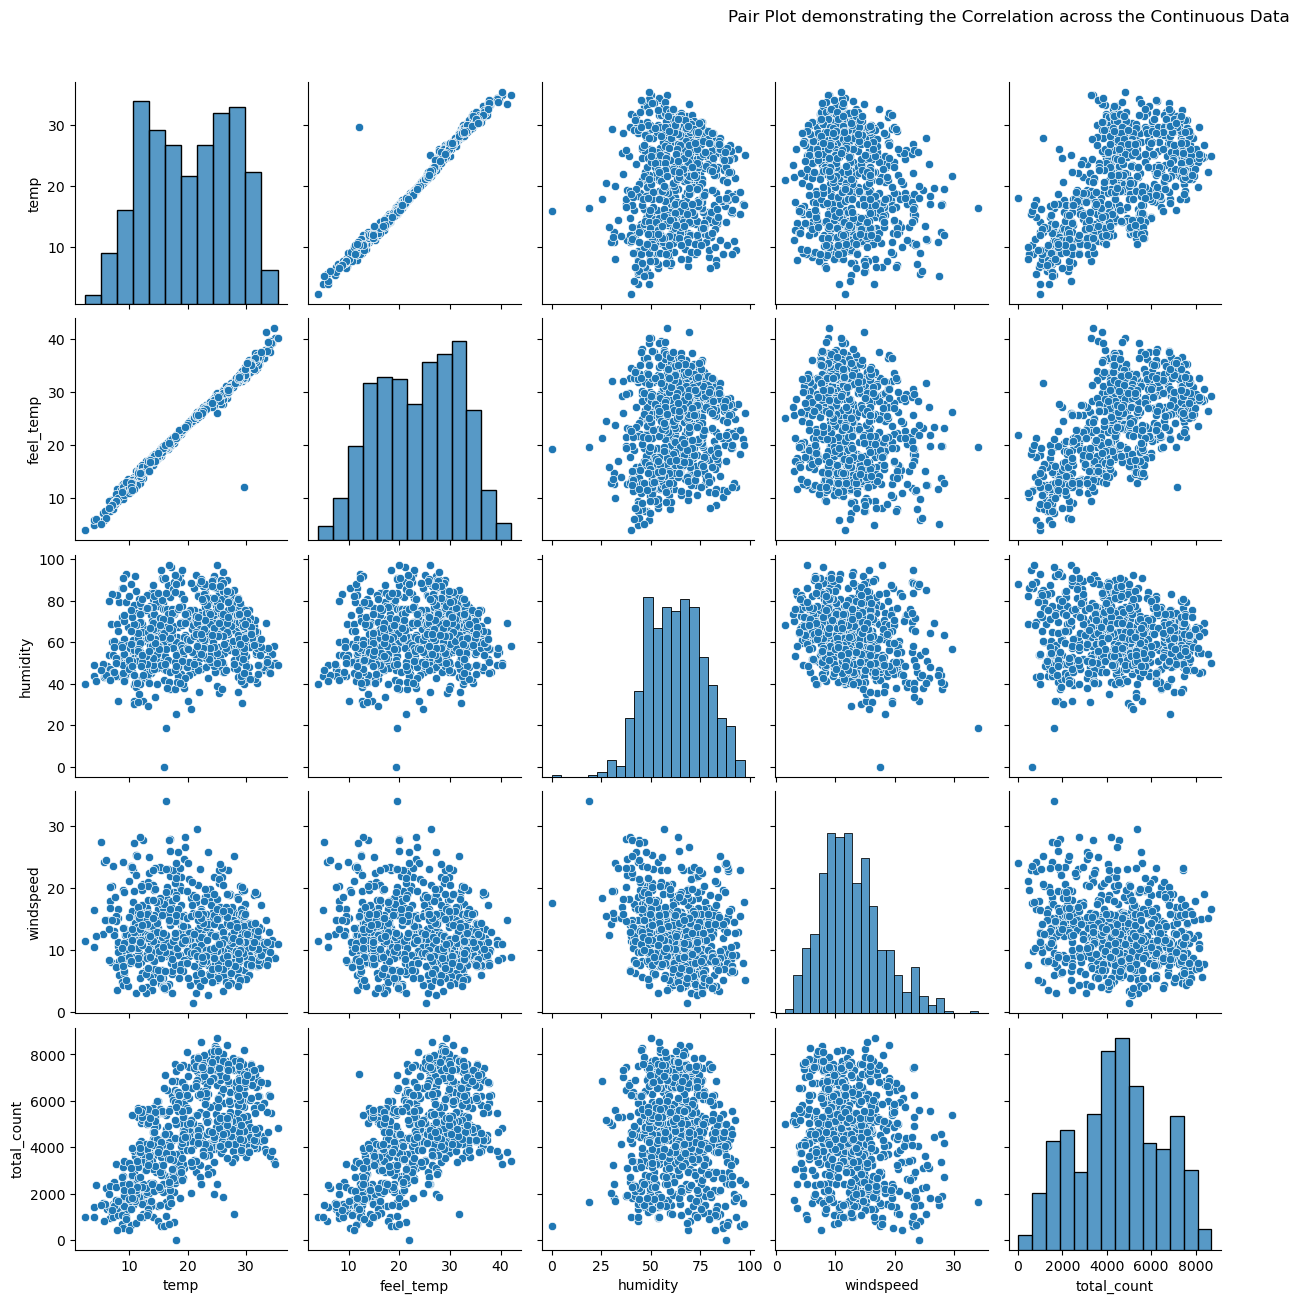

In [18]:
sns.pairplot(data[continuous_variables + ['total_count']])
plt.title('Pair Plot demonstrating the Correlation across the Continuous Data', y=5.5, x=0.0 )
plt.show()

> The total_count seems to have a correation between the temp, feel_temp fields


> Also, the temp and feel_temp seems to have a very high correlation as most of the dots in the scatter plot are aligned forming  a straight line.



In [101]:
data.loc[:, ['temp', 'feel_temp', 'humidity', 'windspeed', 'total_count']].corr()

,temp,feel_temp,humidity,windspeed,total_count
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
feel_temp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
total_count,0.627044,0.630685,-0.098543,-0.235132,1.000000


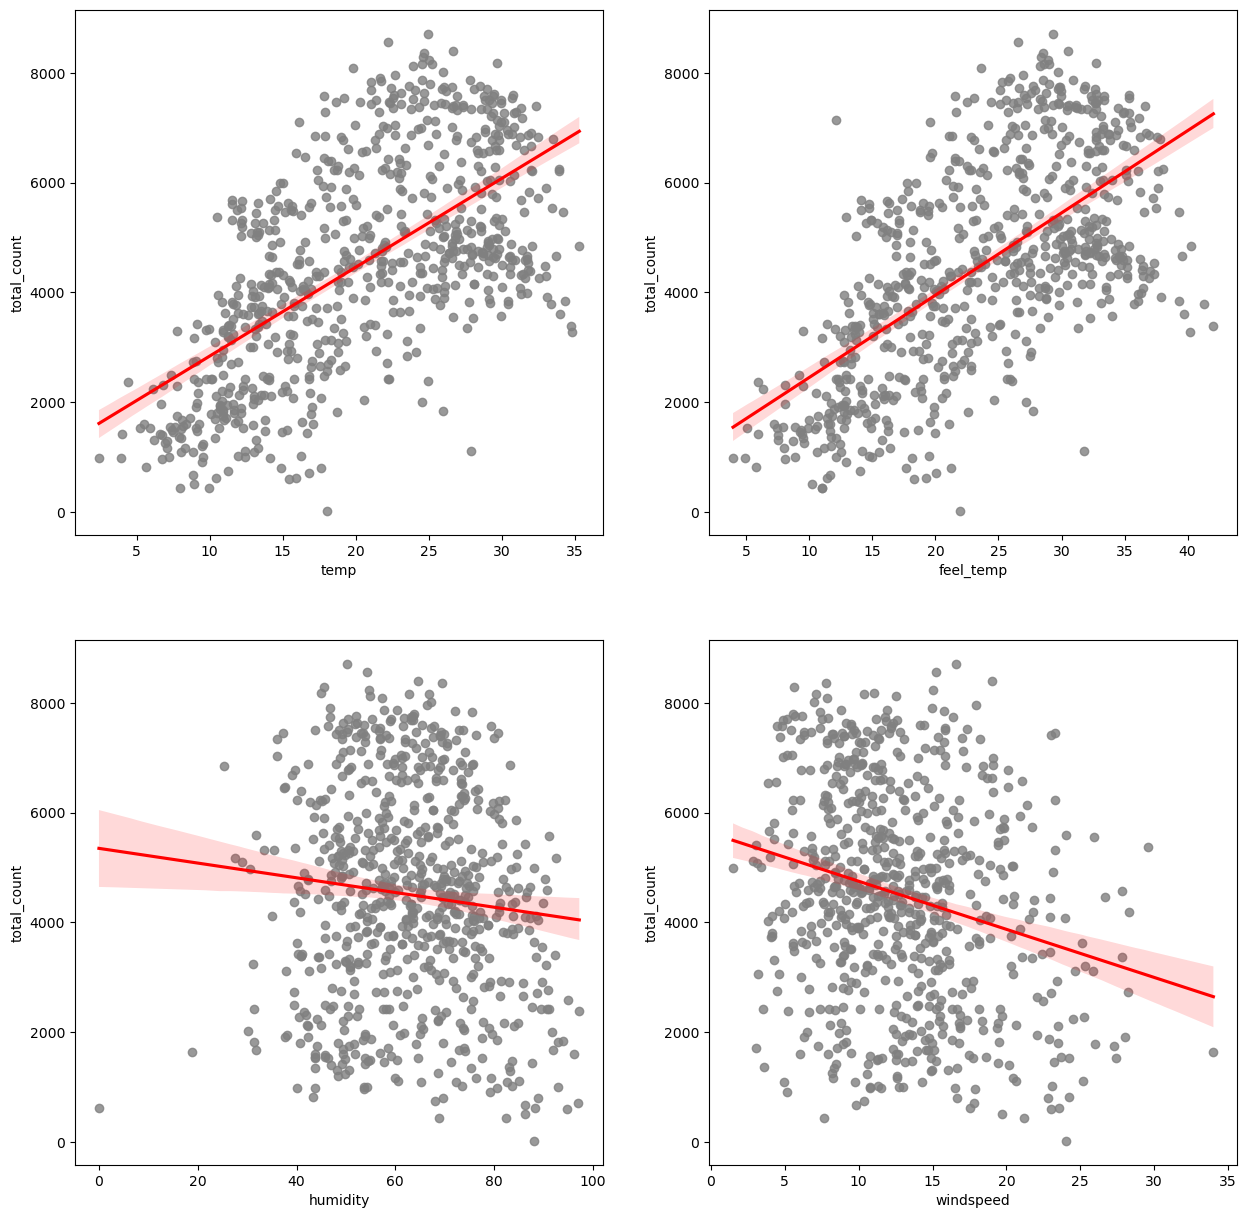

In [118]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.regplot(data=data, x='temp', y='total_count', line_kws={"color":"Red"}, scatter_kws={'color':'gray'})

plt.subplot(2,2,2)
sns.regplot(data=data, x='feel_temp', y='total_count', line_kws={"color":"Red"}, scatter_kws={'color':'gray'})

plt.subplot(2,2,3)
sns.regplot(data=data, x='humidity', y='total_count', line_kws={"color":"Red"}, scatter_kws={'color':'gray'})

plt.subplot(2,2,4)
sns.regplot(data=data, x='windspeed', y='total_count', line_kws={"color":"Red"}, scatter_kws={'color':'gray'})
plt.show()

**Data Shows**
- A good +ve correlation between the total_count and the temp variable.
- A good +ve correlation between the total_count and the feel_temp variable.
- A week -ve correlation between the total_count and the humidity variable.
- A good -ve correlation between the total_count and the humidity variable.

#### Analysis of Categorical Variables

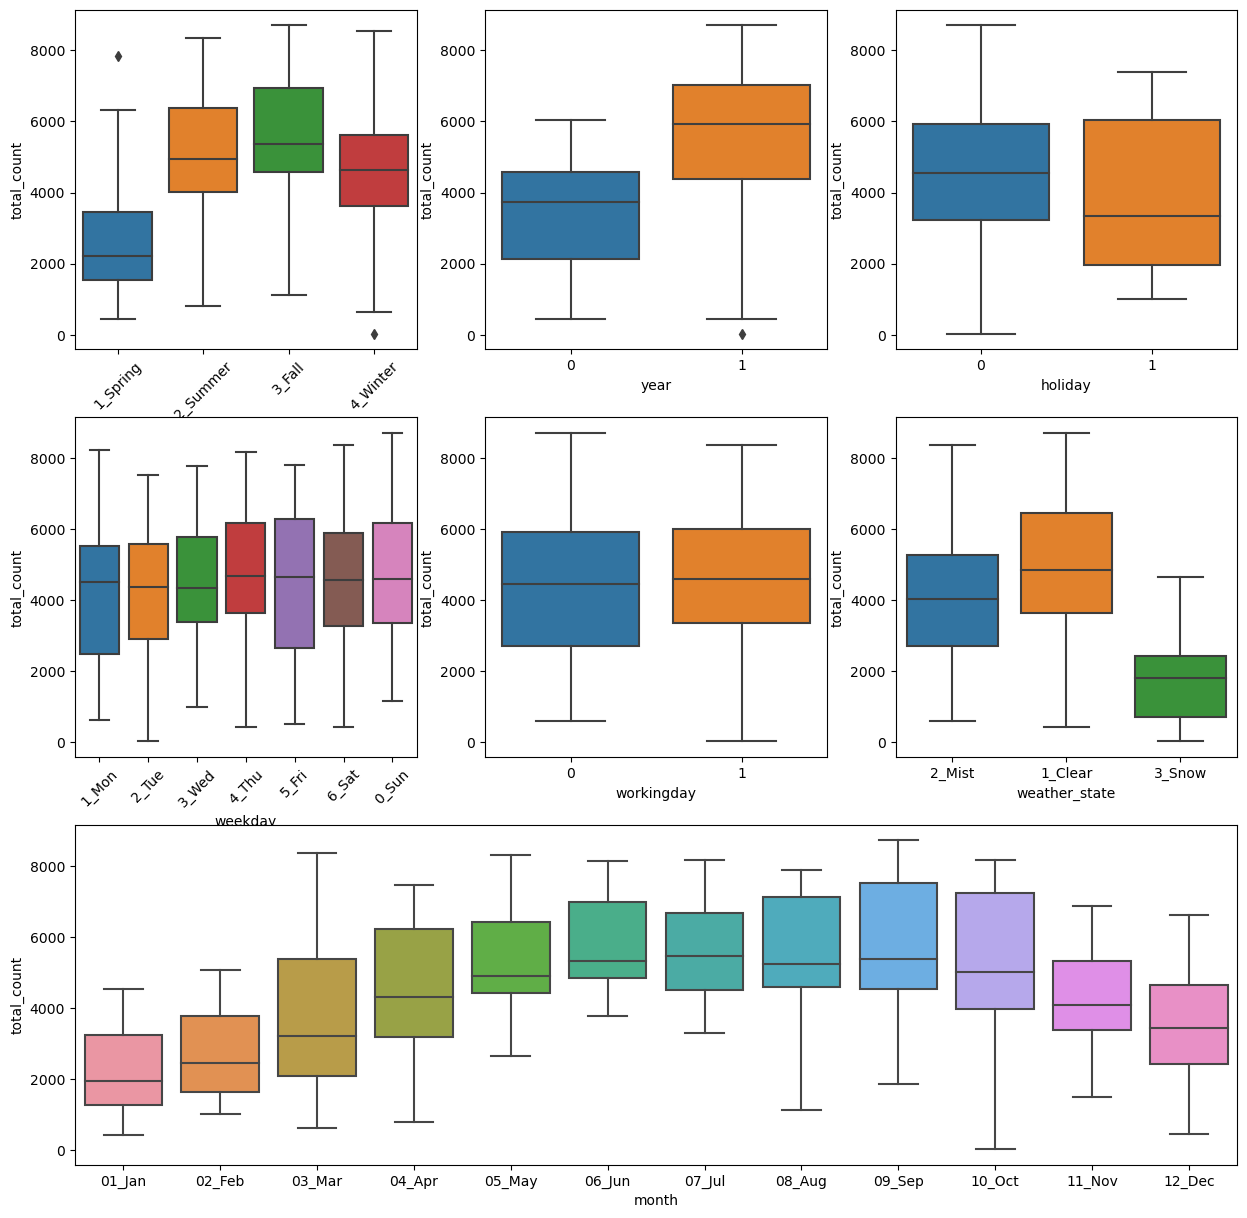

In [20]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.boxplot(data=data, x='season', y='total_count')
plt.xticks(rotation=45)

#plt.show()

plt.subplot(3,3,2)
sns.boxplot(data=data, x='year', y='total_count')
#plt.xticks(rotation=45)

#plt.show()

plt.subplot(3,3,3)
sns.boxplot(data=data, x='holiday', y='total_count')
#plt.xticks(rotation=45)

#plt.show()

plt.subplot(3,3,4)
sns.boxplot(data=data, x='weekday', y='total_count')
plt.xticks(rotation=45)


#plt.show()
plt.subplot(3,3,5)
sns.boxplot(data=data, x='workingday', y='total_count')
#plt.xticks(rotation=45)

#plt.show()

plt.subplot(3,3,6)
sns.boxplot(data=data, x='weather_state', y='total_count')
#plt.xticks(rotation=45)

#plt.show()
plt.subplot(3,3,(7, 9))
sns.boxplot(data=data, x='month', y='total_count')
#plt.xticks(rotation=45)

plt.show()

##### Observations 
- Most of the variables have no outliers and the data seems well distributed.
- There seems to be a high number of bike borrowers during the fall season.
- There seems to be a considerate amount of increase in the sales in yoy.
- There seems to be consistent bike borrowers during working days.. and this count is low during holidays. This could mean that the bike sharing is more actively done at activity zones corresponding to the working days schedule.

- The average bike borrowers is constant for any day of the week. However, we see less amount during mondays and fridays. 

- There seems to be a good of total_counts based on the weather; and with clear weather attracting highest amount of counts. 

- We observe a pattern of consistent increase during the months 8,9,10 and eventually drops down following a normal distribution. Also, the variantion of the monthly data shows it affects the total_counts.


> **Conslusion**: There are atleast few variables that are +vely correlated with the value_counts.

#### Variables of Linear Regression

- Dependent Variable: **cnt**
- Independent Variables: *season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed*

### Data Preperation

##### Encoding the Data
- The Data in categorical variables to dummy variables.

In [21]:
# Variables that can be converted to dummy variables:
dummy_vars = ['season','weekday','weather_state','month']

for each_var in dummy_vars:
    data = pd.concat([data, pd.get_dummies(data[each_var], drop_first=True)], axis=1)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        730 non-null    int64         
 1   dteday         730 non-null    datetime64[ns]
 2   season         730 non-null    object        
 3   year           730 non-null    int64         
 4   month          730 non-null    object        
 5   holiday        730 non-null    int64         
 6   weekday        730 non-null    object        
 7   workingday     730 non-null    int64         
 8   weather_state  730 non-null    object        
 9   temp           730 non-null    float64       
 10  feel_temp      730 non-null    float64       
 11  humidity       730 non-null    float64       
 12  windspeed      730 non-null    float64       
 13  casual         730 non-null    int64         
 14  registered     730 non-null    int64         
 15  total_count    730 non-

- We can remove the old columns and create a new dataset. 

In [22]:
analysis_data = data.drop(['instant', 'dteday', 'season', 'month', 'weekday', 'weather_state', 'casual', 'registered'], axis=1)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   feel_temp    730 non-null    float64
 5   humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   total_count  730 non-null    int64  
 8   2_Summer     730 non-null    uint8  
 9   3_Fall       730 non-null    uint8  
 10  4_Winter     730 non-null    uint8  
 11  1_Mon        730 non-null    uint8  
 12  2_Tue        730 non-null    uint8  
 13  3_Wed        730 non-null    uint8  
 14  4_Thu        730 non-null    uint8  
 15  5_Fri        730 non-null    uint8  
 16  6_Sat        730 non-null    uint8  
 17  2_Mist       730 non-null    uint8  
 18  3_Snow       730 non-null    uint8  
 19  02_Feb  

In [23]:
analysis_data.describe()

,year,holiday,workingday,temp,feel_temp,humidity,windspeed,total_count,2_Summer,3_Fall,...,03_Mar,04_Apr,05_May,06_Jun,07_Jul,08_Aug,09_Sep,10_Oct,11_Nov,12_Dec
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,...,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,...,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the Data

- Splitting the data in the form of 70% as training set and 30% as testing data sets.

In [24]:
df_train, df_test = train_test_split(analysis_data, train_size=0.7, random_state = 100)
print("Training Dataset:", df_train.shape)
print("Training Dataset:", df_test.shape)

Training Dataset: (510, 30)
Training Dataset: (220, 30)


### Feature Scaling

- To ensure the variables are on the same scale we can rescale the data. Rescaling helps normalize the data so that their coefficients can be compared/interpretted. 
- For this Case-Study, we'll use the Min-Max scaling; which will compress the data between 0-1.
- Rescaling is to be done only for the numeric variables.

In [25]:
analysis_data.describe().loc[['min', 'max'], :].transpose().sort_values('max', ascending=False)
# Look for the min-max values not in the range of 0-1...

,min,max
total_count,22.000000,8714.000000
humidity,0.000000,97.250000
feel_temp,3.953480,42.044800
temp,2.424346,35.328347
windspeed,1.500244,34.000021
year,0.000000,1.000000
07_Jul,0.000000,1.000000
03_Mar,0.000000,1.000000
04_Apr,0.000000,1.000000
05_May,0.000000,1.000000


In [26]:
numeric_variables = ['temp','feel_temp','humidity','windspeed', 'total_count']

In [27]:
# Initialize the MinMaxScaler
min_max_scaler_train = MinMaxScaler() #Normalization
df_train[numeric_variables] = min_max_scaler_train.fit_transform(df_train[numeric_variables])
df_train.head()
df_train.describe()

,year,holiday,workingday,temp,feel_temp,humidity,windspeed,total_count,2_Summer,3_Fall,...,03_Mar,04_Apr,05_May,06_Jun,07_Jul,08_Aug,09_Sep,10_Oct,11_Nov,12_Dec
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


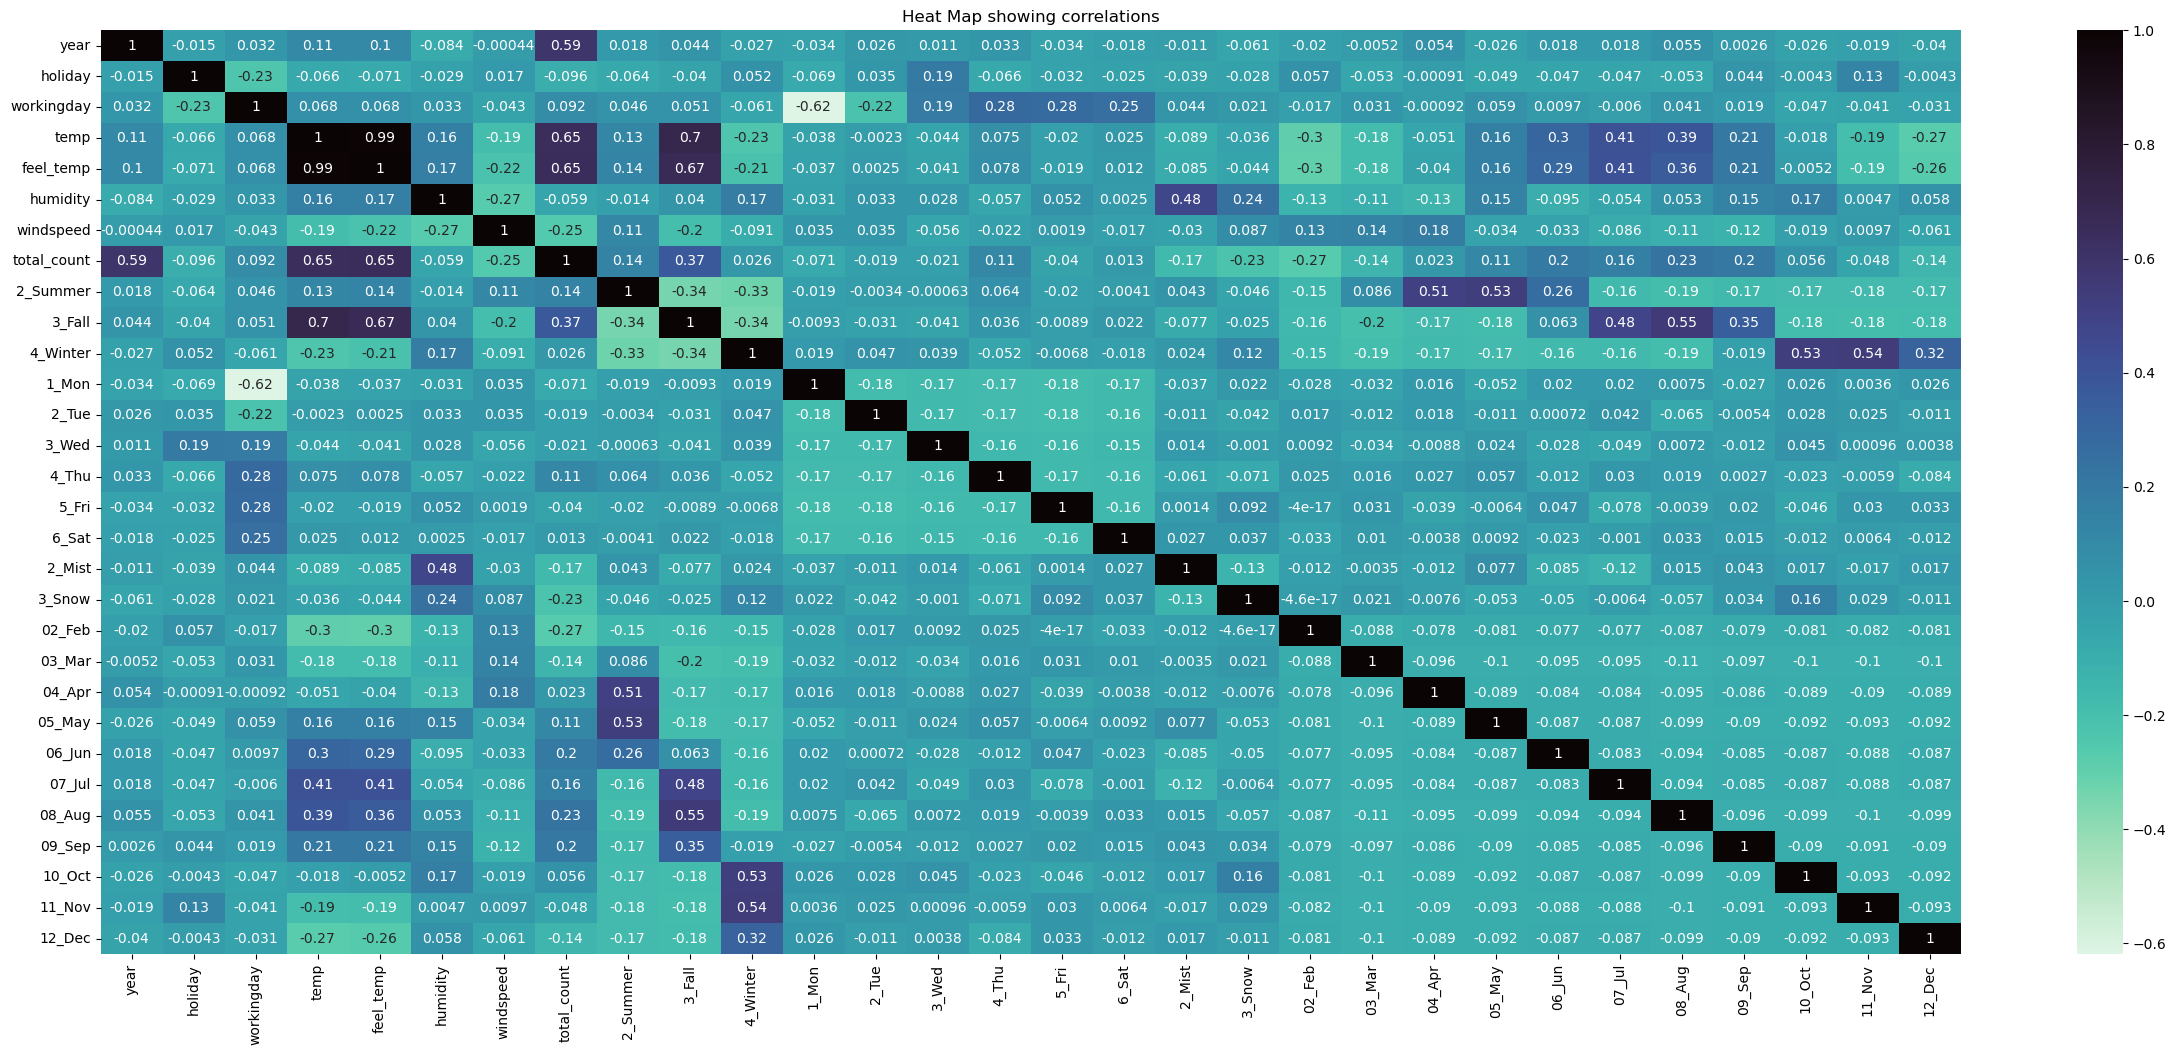

In [28]:
plt.figure( figsize=(30,12))

sns.heatmap(data=df_train.corr(), annot=True, cmap="mako_r")

plt.title("Heat Map showing correlations")
plt.show()

#### INSIGHTS:
   - The heatmap reveals that there is a strong correlation of total_count with the temp, feel_temp, 3_fall, year columns.. 
   - Also, there seems to be a good correlation between the following sets of columns:
       - temp & feel_temp
       - 3_Fall & temp
       - 3_Fall & feel_temp
       - humidity & 2_Mist
       - 2_Summer & 04_Apr
       - 2_Summer & 05_May
       - 3_Fall & 07_Jul
       - 3_Fall & 08_Aug
       - 4_Winter & 10_Oct
       - 4_Winter & 11_Nov
       
   - These correlations indicate the existance of Multicollinearity among various variables. This voilates the rule of Linear Regression: Predictor Variables shall be independent. 
   - This can be handled by computing the VIF values for the variables during MLR (Multiple Linear Regression).

### Building the Model

- Let's assume the following:
    - The value of alpha (significance level) is set to 5% (ie., 0.05%)

##### Create separate sets for X (independent variables) and y (dependent variables)

In [29]:
y_train = df_train.pop('total_count')
X_train = df_train

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   feel_temp   510 non-null    float64
 5   humidity    510 non-null    float64
 6   windspeed   510 non-null    float64
 7   2_Summer    510 non-null    uint8  
 8   3_Fall      510 non-null    uint8  
 9   4_Winter    510 non-null    uint8  
 10  1_Mon       510 non-null    uint8  
 11  2_Tue       510 non-null    uint8  
 12  3_Wed       510 non-null    uint8  
 13  4_Thu       510 non-null    uint8  
 14  5_Fri       510 non-null    uint8  
 15  6_Sat       510 non-null    uint8  
 16  2_Mist      510 non-null    uint8  
 17  3_Snow      510 non-null    uint8  
 18  02_Feb      510 non-null    uint8  
 19  03_Mar      510 non-null   

In [31]:
def prepare_lr_model(X: pd.Series, y: pd.Series, variables:set[str] =[]): #
    if len(variables) == 0:
        X_train = X
    else:
        X_train = X[variables]
    
    print("Variables Involved in the model:\n\n ", X_train.columns)

    X_train_sm = sm.add_constant(X_train)
    linear_reg = sm.OLS(y, X_train_sm)
    linear_reg_model = linear_reg.fit()
    #print(linear_reg_model.summary())
    return linear_reg_model, X_train_sm

### Simple Linear Regression

In [32]:
lr_with_temp, X_train_sm = prepare_lr_model(X_train, y_train, ['temp'])

lr_with_temp.summary()

Variables Involved in the model:

  Index(['temp'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 10 May 2023   Prob (F-statistic):           2.46e-61
Time:                        02:32:20   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Insights
- The Simple regression model (SLR) with only Temperature variable.
- The coefficients are both positive. As the temp. goes up, the counts are going up.
- The SLR has a P value of both the constant and the temperature to be 0 ==> The Coefficients are statistically significant. 
- The R2 value for this SLR is 0.416 ==> 41.6% of the variance in data can be explained by the temperature.
- The Adj.R2 value is 0.415.

In [33]:
X_train_sm.head()

,const,temp
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666
111,1.0,0.345824


### Multiple Linear Regression

Multiple Linear Regression

- Approach: Forward addition.
    - We'll start adding one more variable and prepare the model.
        Using the insights, we'll check the next step.

In [34]:
lr_with_temp_feel_temp, X_train_sm = prepare_lr_model(X_train, y_train, ['temp', 'feel_temp'])

lr_with_temp_feel_temp.summary()

Variables Involved in the model:

  Index(['temp', 'feel_temp'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 10 May 2023   Prob (F-statistic):           8.38e-61
Time:                        02:32:20   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
feel_temp      0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Insights
- The Multiple regression model (MLR) with temp and feel_temp variables.
- All the coefficients are positive.
- The P-Value of both the the temp and feel_temp are not 0 and is greater than the Alpha Value of (0.05). Hence, we cannot conclude that the value of temp would actually effect the dependent variable total_count. 
    - This was contrary to our earlier analysis. It is due to the inclusion of the feel_temp variable which makes the temp conclusively ineffective. 
    - The P-Value of the temp is 0.426
==> The Coefficients cannot be concluded that they are statistically significant. 
- The R2 value for this MLR is 0.421.
- The Adj.R2 value is 0.418.

In [35]:
lr_with_all_strong_corr, X_train_sm = prepare_lr_model(X_train, y_train, ['temp', 'feel_temp', '3_Fall', 'year'])
lr_with_all_strong_corr.summary()

Variables Involved in the model:

  Index(['temp', 'feel_temp', '3_Fall', 'year'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     297.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.73e-131
Time:                        02:32:21   Log-Likelihood:                 347.75
No. Observations:                 510   AIC:                            -685.5
Df Residuals:                     505   BIC:                            -664.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0496      0.017      2.974      0.003       0.017       0.082
temp           0.2494      0.177      1.410      0.159      -0.098       0.597
feel_temp      0.4363      0.181      2.405      0.017       0.080       0.793
3_Fall        -0.0521      0.018     -2.959      0.003      -0.087      -0.018
year           0.2357      0.011     21.484      0.000       0.214       0.257
==============================================================================
Omnibus:                       42.005   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.449
Skew:                          -0.577   Prob(JB):                     6.14e-15
Kurtosis:                       4.322   Cond. No.                         65.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
def calculate_vif(X: pd.Series, variables:set[str] =[]):
    vif = pd.DataFrame()
    features_to_analyse = variables
    X_train = X[variables]
    if len(variables) == 0:
        features_to_analyse = X.columns
        X_train = X
    vif['Features'] = features_to_analyse
    vif['VIF'] = [round(variance_inflation_factor(X_train.values, i), 3) for i in range(X_train.shape[1])]
    vif.sort_values(by='VIF', ascending=False)
    vif.set_index('Features', inplace=True)
    return vif

In [37]:
calculate_vif(X_train, ['temp', 'feel_temp', '3_Fall', 'year'])

,VIF
Features,
temp,353.676
feel_temp,341.507
3_Fall,2.182
year,1.953


#### Insights
- The Multiple regression model (MLR) with temp, feel_temp, 3_Fall & year variables.
- All the coefficients are positive.
- The P-Value of both the the temp and feel_temp are not 0 and the p-value of temp is greater than the Alpha Value of (0.05). Hence, we cannot conclude that the value of temp would actually effect the dependent variable total_count. 
    - This was contrary to our earlier analysis. It is due to the inclusion of the other variables which makes the temp conclusively ineffective. 
    - The P-Value of the temp is 0.159
==> The Coefficients cannot be concluded that they are statistically significant, as some of the coefficients are in negatives. This could mean that, given all the other independent variables are constant, an increase in the fall, would result in decrease of the total_counts.
- The R2 value for this MLR is 0.702.
- The Adj.R2 value is 0.700.
- Also, the VIF for temp and feel_temp are very high...

> Instead of replacing one of these variables with a new variable, we can change the approach to backward. This will add all the variables at once and we can later remove the unwanted ones.

**Change of approach to backward**
- Add all and remove the ineffective columns...

In [38]:
backward_results_0, X_train_sm = prepare_lr_model(X_train, y_train)
backward_results_0.summary()

Variables Involved in the model:

  Index(['year', 'holiday', 'workingday', 'temp', 'feel_temp', 'humidity',
       'windspeed', '2_Summer', '3_Fall', '4_Winter', '1_Mon', '2_Tue',
       '3_Wed', '4_Thu', '5_Fri', '6_Sat', '2_Mist', '3_Snow', '02_Feb',
       '03_Mar', '04_Apr', '05_May', '06_Jun', '07_Jul', '08_Aug', '09_Sep',
       '10_Oct', '11_Nov', '12_Dec'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.80
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.77e-177
Time:                        02:32:21   Log-Likelihood:                 522.69
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     480   BIC:                            -858.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2353      0.031      7.548      0.000       0.174       0.297
year           0.2316      0.008     28.424      0.000       0.216       0.248
holiday       -0.0835      0.029     -2.875      0.004      -0.140      -0.026
workingday     0.0002      0.015      0.012      0.990      -0.029       0.029
temp           0.3907      0.144      2.720      0.007       0.108       0.673
feel_temp      0.0528      0.140      0.378      0.705      -0.221       0.327
humidity      -0.1570      0.039     -4.027      0.000      -0.234      -0.080
windspeed     -0.1810      0.027     -6.774      0.000      -0.233      -0.128
2_Summer       0.0866      0.024      3.623      0.000       0.040       0.133
3_Fall         0.0406      0.030      1.337      0.182      -0.019       0.100
4_Winter       0.1519      0.026      5.784      0.000       0.100       0.204
1_Mon         -0.0343      0.017     -2.033      0.043      -0.067      -0.001
2_Tue         -0.0355      0.015     -2.375      0.018      -0.065      -0.006
3_Wed         -0.0192      0.017     -1.136      0.257      -0.052       0.014
4_Thu         -0.0057      0.017     -0.339      0.735      -0.038       0.027
5_Fri         -0.0097      0.017     -0.586      0.558      -0.042       0.023
6_Sat         -0.0059      0.017     -0.347      0.729      -0.039       0.027
2_Mist        -0.0576      0.011     -5.463      0.000      -0.078      -0.037
3_Snow        -0.2491      0.027     -9.312      0.000      -0.302      -0.197
02_Feb         0.0268      0.021      1.288      0.198      -0.014       0.068
03_Mar         0.0645      0.023      2.854      0.005       0.020       0.109
04_Apr         0.0636      0.034      1.874      0.062      -0.003       0.130
05_May         0.0885      0.037      2.420      0.016       0.017       0.160
06_Jun         0.0726      0.039      1.845      0.066      -0.005       0.150
07_Jul         0.0355      0.044      0.799      0.425      -0.052       0.123
08_Aug         0.0919      0.042      2.169      0.031       0.009       0.175
09_Sep         0.1552      0.038      4.104      0.000       0.081       0.230
10_Oct         0.0700      0.035      2.007      0.045       0.001       0.139
11_Nov         0.0229      0.033      0.689      0.491      -0.042       0.088
12_Dec         0.0200      0.027      0.744      0.457      -0.033       0.073
==============================================================================
Omnibus:                       78.192   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.835
Skew:                          -0.769   Prob(JB):                     9.01e-45
Kurtosis:                       5.680   Cond. No.                         92.5
==============================================================================

N

#### INSIGHTS
- Following variables are -vely correlated as their coefficients are -ve:


In [39]:
backward_results_0.params[backward_results_0.params<0].index

Index(['holiday', 'humidity', 'windspeed', '1_Mon', '2_Tue', '3_Wed', '4_Thu',
       '5_Fri', '6_Sat', '2_Mist', '3_Snow'],
      dtype='object')

**The P-Values for the following variables are high than the significance factor (alpha = 0.05)**

In [40]:
backward_results_0.pvalues[backward_results_0.pvalues > 0.05]

workingday    0.990085
feel_temp     0.705407
3_Fall        0.181701
3_Wed         0.256649
4_Thu         0.734834
5_Fri         0.558044
6_Sat         0.728545
02_Feb        0.198258
04_Apr        0.061515
06_Jun        0.065593
07_Jul        0.424579
11_Nov        0.491003
12_Dec        0.457242
dtype: float64

> **As all these columns cannot be ignored, we will further analyze the VIF factor to decide on what variables can be ignored.**

In [41]:
def compare_results(vif: pd.Series, lr_summary): #p_values:  pd.Series
    results_to_compare = pd.concat([vif,  round(lr_summary.params, 3), round(lr_summary.pvalues, 3)], axis=1)

    results_to_compare.rename(columns={0:'Coef', 1:'P_Value'}, inplace=True)
    results_to_compare.sort_values(by=['P_Value', 'VIF'], ascending=[False, False], inplace=True)
    return results_to_compare


##### LOCAL FUNCTIONS: 


    prepare_lr_model(X, y, [vars])  ==> Linear Regression summary, X_train_sm.
    calculate_vif(X, [vars]) ==> Calculation of the Variable Influence Factors.
    compare_results(vif, p_values) ===> Returns a Series of data with VIF and P-Values sorted with P-Values, VIF in descending order.

##### Compute the VIF and compare with the P-Values for all the backward calculation.

In [42]:
vif = calculate_vif(X_train)
p_values = round(backward_results_0.pvalues, 3)
backward_compare = compare_results(vif, backward_results_0)
backward_compare

,VIF,Coef,P_Value
workingday,9.011,0.000,0.990
4_Thu,2.505,-0.006,0.735
6_Sat,2.329,-0.006,0.729
feel_temp,382.314,0.053,0.705
5_Fri,2.550,-0.010,0.558
11_Nov,6.007,0.023,0.491
12_Dec,3.785,0.020,0.457
07_Jul,9.608,0.036,0.425
3_Wed,2.411,-0.019,0.257
02_Feb,1.718,0.027,0.198


#### INSIGHTS

- From the above data, we see that there variables with very large number of P-Values and VIF factors. 
- This category can be broken in to 4 sets:
    - Variables with HIGH VIF and P Values...
    - Variables with LOW  VIF and P Values...
    - Variables with HIGH VIF and LOW P Values...
    - Variables with LOW VIF and HIGH P Values...

##### TODO:

- From the above insights, we observe that the workingday field has more P_Value of 0.990 (which is >>> 0.05 - significance level). Hence, let's try eleminating the variable.

In [43]:
## Variables with Both High VIF and P_Values
backward_compare[((backward_compare['VIF'] > 10) | (backward_compare['P_Value'] > 0.05))]

,VIF,Coef,P_Value
workingday,9.011,0.000,0.990
4_Thu,2.505,-0.006,0.735
6_Sat,2.329,-0.006,0.729
feel_temp,382.314,0.053,0.705
5_Fri,2.550,-0.010,0.558
11_Nov,6.007,0.023,0.491
12_Dec,3.785,0.020,0.457
07_Jul,9.608,0.036,0.425
3_Wed,2.411,-0.019,0.257
02_Feb,1.718,0.027,0.198


In [44]:
variables_involved_in_model = X_train.columns
variables_involved_in_model = variables_involved_in_model.drop('workingday')

backward_results_01, X_train_sm = prepare_lr_model(X_train, y_train, variables_involved_in_model)
backward_results_01.summary()

Variables Involved in the model:

  Index(['year', 'holiday', 'temp', 'feel_temp', 'humidity', 'windspeed',
       '2_Summer', '3_Fall', '4_Winter', '1_Mon', '2_Tue', '3_Wed', '4_Thu',
       '5_Fri', '6_Sat', '2_Mist', '3_Snow', '02_Feb', '03_Mar', '04_Apr',
       '05_May', '06_Jun', '07_Jul', '08_Aug', '09_Sep', '10_Oct', '11_Nov',
       '12_Dec'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.35
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.78e-178
Time:                        02:32:21   Log-Likelihood:                 522.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     481   BIC:                            -864.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2354      0.030      7.789      0.000       0.176       0.295
year           0.2316      0.008     28.467      0.000       0.216       0.248
holiday       -0.0836      0.026     -3.173      0.002      -0.135      -0.032
temp           0.3907      0.143      2.724      0.007       0.109       0.672
feel_temp      0.0529      0.139      0.379      0.705      -0.221       0.327
humidity      -0.1570      0.039     -4.031      0.000      -0.234      -0.080
windspeed     -0.1810      0.027     -6.783      0.000      -0.233      -0.129
2_Summer       0.0866      0.024      3.627      0.000       0.040       0.133
3_Fall         0.0406      0.030      1.340      0.181      -0.019       0.100
4_Winter       0.1520      0.026      5.791      0.000       0.100       0.204
1_Mon         -0.0344      0.015     -2.317      0.021      -0.064      -0.005
2_Tue         -0.0355      0.015     -2.384      0.018      -0.065      -0.006
3_Wed         -0.0191      0.015     -1.234      0.218      -0.049       0.011
4_Thu         -0.0056      0.015     -0.367      0.713      -0.035       0.024
5_Fri         -0.0096      0.015     -0.640      0.523      -0.039       0.020
6_Sat         -0.0058      0.015     -0.375      0.708      -0.036       0.025
2_Mist        -0.0576      0.011     -5.473      0.000      -0.078      -0.037
3_Snow        -0.2491      0.027     -9.323      0.000      -0.302      -0.197
02_Feb         0.0268      0.021      1.290      0.198      -0.014       0.068
03_Mar         0.0645      0.023      2.857      0.004       0.020       0.109
04_Apr         0.0636      0.034      1.876      0.061      -0.003       0.130
05_May         0.0885      0.037      2.422      0.016       0.017       0.160
06_Jun         0.0726      0.039      1.848      0.065      -0.005       0.150
07_Jul         0.0355      0.044      0.800      0.424      -0.052       0.123
08_Aug         0.0919      0.042      2.171      0.030       0.009       0.175
09_Sep         0.1552      0.038      4.109      0.000       0.081       0.229
10_Oct         0.0700      0.035      2.009      0.045       0.002       0.138
11_Nov         0.0229      0.033      0.690      0.491      -0.042       0.088
12_Dec         0.0200      0.027      0.745      0.457      -0.033       0.073
==============================================================================
Omnibus:                       78.216   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.810
Skew:                          -0.769   Prob(JB):                     9.13e-45
Kurtosis:                       5.679   Cond. No.                         85.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [45]:
vif = calculate_vif(X_train[variables_involved_in_model], variables_involved_in_model)

backward_compare = compare_results(vif, backward_results_01)
backward_compare

,VIF,Coef,P_Value
4_Thu,1.977,-0.006,0.713
6_Sat,1.843,-0.006,0.708
feel_temp,381.623,0.053,0.705
5_Fri,2.019,-0.010,0.523
11_Nov,6.007,0.023,0.491
12_Dec,3.781,0.020,0.457
07_Jul,9.601,0.036,0.424
3_Wed,1.934,-0.019,0.218
02_Feb,1.713,0.027,0.198
3_Fall,15.374,0.041,0.181


In [46]:
## Variables with Both High VIF and P_Values
backward_compare[(backward_compare['VIF'] > 10) | (backward_compare['P_Value'] > 0.05)]

,VIF,Coef,P_Value
4_Thu,1.977,-0.006,0.713
6_Sat,1.843,-0.006,0.708
feel_temp,381.623,0.053,0.705
5_Fri,2.019,-0.010,0.523
11_Nov,6.007,0.023,0.491
12_Dec,3.781,0.020,0.457
07_Jul,9.601,0.036,0.424
3_Wed,1.934,-0.019,0.218
02_Feb,1.713,0.027,0.198
3_Fall,15.374,0.041,0.181


> Observing the data, we see the variable 'feel_temp' has a high VIF and also a high 'P_Value'. Upon dropping the 'feel_temp' column...

In [47]:
variables_involved_in_model = variables_involved_in_model.drop('feel_temp')

backward_results_02, X_train_sm = prepare_lr_model(X_train, y_train, variables_involved_in_model)
backward_results_02.summary()

Variables Involved in the model:

  Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', '2_Summer',
       '3_Fall', '4_Winter', '1_Mon', '2_Tue', '3_Wed', '4_Thu', '5_Fri',
       '6_Sat', '2_Mist', '3_Snow', '02_Feb', '03_Mar', '04_Apr', '05_May',
       '06_Jun', '07_Jul', '08_Aug', '09_Sep', '10_Oct', '11_Nov', '12_Dec'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.88e-179
Time:                        02:32:21   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     482   BIC:                            -870.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2358      0.030      7.815      0.000       0.176       0.295
year           0.2315      0.008     28.493      0.000       0.216       0.248
holiday       -0.0842      0.026     -3.202      0.001      -0.136      -0.033
temp           0.4421      0.047      9.455      0.000       0.350       0.534
humidity      -0.1565      0.039     -4.025      0.000      -0.233      -0.080
windspeed     -0.1831      0.026     -7.034      0.000      -0.234      -0.132
2_Summer       0.0867      0.024      3.635      0.000       0.040       0.134
3_Fall         0.0401      0.030      1.326      0.185      -0.019       0.100
4_Winter       0.1520      0.026      5.797      0.000       0.100       0.203
1_Mon         -0.0343      0.015     -2.316      0.021      -0.063      -0.005
2_Tue         -0.0354      0.015     -2.383      0.018      -0.065      -0.006
3_Wed         -0.0191      0.015     -1.233      0.218      -0.049       0.011
4_Thu         -0.0055      0.015     -0.366      0.715      -0.035       0.024
5_Fri         -0.0096      0.015     -0.640      0.522      -0.039       0.020
6_Sat         -0.0062      0.015     -0.403      0.687      -0.036       0.024
2_Mist        -0.0577      0.011     -5.482      0.000      -0.078      -0.037
3_Snow        -0.2498      0.027     -9.378      0.000      -0.302      -0.197
02_Feb         0.0269      0.021      1.294      0.196      -0.014       0.068
03_Mar         0.0645      0.023      2.858      0.004       0.020       0.109
04_Apr         0.0638      0.034      1.884      0.060      -0.003       0.130
05_May         0.0879      0.036      2.410      0.016       0.016       0.160
06_Jun         0.0716      0.039      1.827      0.068      -0.005       0.149
07_Jul         0.0347      0.044      0.782      0.435      -0.052       0.122
08_Aug         0.0904      0.042      2.147      0.032       0.008       0.173
09_Sep         0.1547      0.038      4.101      0.000       0.081       0.229
10_Oct         0.0701      0.035      2.012      0.045       0.002       0.138
11_Nov         0.0231      0.033      0.696      0.487      -0.042       0.088
12_Dec         0.0202      0.027      0.754      0.451      -0.032       0.073
==============================================================================
Omnibus:                       77.558   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.597
Skew:                          -0.764   Prob(JB):                     2.76e-44
Kurtosis:                       5.666   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = calculate_vif(X_train[variables_involved_in_model], variables_involved_in_model)
backward_compare = compare_results(vif, backward_results_02)
backward_compare

,VIF,Coef,P_Value
4_Thu,1.977,-0.006,0.715
6_Sat,1.836,-0.006,0.687
5_Fri,2.019,-0.010,0.522
11_Nov,6.005,0.023,0.487
12_Dec,3.778,0.020,0.451
07_Jul,9.576,0.035,0.435
3_Wed,1.933,-0.019,0.218
02_Feb,1.712,0.027,0.196
3_Fall,15.349,0.040,0.185
06_Jun,7.453,0.072,0.068


In [49]:
## Variables with Both High VIF and P_Values
backward_compare[(backward_compare['VIF'] > 10) | (backward_compare['P_Value'] > 0.05)]

,VIF,Coef,P_Value
4_Thu,1.977,-0.006,0.715
6_Sat,1.836,-0.006,0.687
5_Fri,2.019,-0.010,0.522
11_Nov,6.005,0.023,0.487
12_Dec,3.778,0.020,0.451
07_Jul,9.576,0.035,0.435
3_Wed,1.933,-0.019,0.218
02_Feb,1.712,0.027,0.196
3_Fall,15.349,0.040,0.185
06_Jun,7.453,0.072,0.068


- Dropping the column '4_Thu' as it has high p-value.

In [50]:
variables_involved_in_model = variables_involved_in_model.drop('4_Thu')

backward_results_03 = prepare_lr_model(X_train, y_train, variables_involved_in_model)[0]

backward_results_03.summary()

Variables Involved in the model:

  Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', '2_Summer',
       '3_Fall', '4_Winter', '1_Mon', '2_Tue', '3_Wed', '5_Fri', '6_Sat',
       '2_Mist', '3_Snow', '02_Feb', '03_Mar', '04_Apr', '05_May', '06_Jun',
       '07_Jul', '08_Aug', '09_Sep', '10_Oct', '11_Nov', '12_Dec'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.94e-180
Time:                        02:32:21   Log-Likelihood:                 522.54
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     483   BIC:                            -876.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2332      0.029      7.963      0.000       0.176       0.291
year           0.2315      0.008     28.517      0.000       0.216       0.247
holiday       -0.0838      0.026     -3.194      0.001      -0.135      -0.032
temp           0.4417      0.047      9.458      0.000       0.350       0.533
humidity      -0.1569      0.039     -4.038      0.000      -0.233      -0.081
windspeed     -0.1829      0.026     -7.033      0.000      -0.234      -0.132
2_Summer       0.0864      0.024      3.630      0.000       0.040       0.133
3_Fall         0.0400      0.030      1.324      0.186      -0.019       0.099
4_Winter       0.1519      0.026      5.800      0.000       0.100       0.203
1_Mon         -0.0315      0.013     -2.484      0.013      -0.056      -0.007
2_Tue         -0.0326      0.013     -2.567      0.011      -0.058      -0.008
3_Wed         -0.0163      0.013     -1.212      0.226      -0.043       0.010
5_Fri         -0.0068      0.013     -0.528      0.598      -0.032       0.019
6_Sat         -0.0034      0.013     -0.255      0.799      -0.030       0.023
2_Mist        -0.0573      0.010     -5.476      0.000      -0.078      -0.037
3_Snow        -0.2494      0.027     -9.379      0.000      -0.302      -0.197
02_Feb         0.0267      0.021      1.287      0.199      -0.014       0.068
03_Mar         0.0646      0.023      2.863      0.004       0.020       0.109
04_Apr         0.0639      0.034      1.889      0.060      -0.003       0.130
05_May         0.0880      0.036      2.415      0.016       0.016       0.160
06_Jun         0.0720      0.039      1.839      0.066      -0.005       0.149
07_Jul         0.0350      0.044      0.791      0.429      -0.052       0.122
08_Aug         0.0907      0.042      2.156      0.032       0.008       0.173
09_Sep         0.1549      0.038      4.111      0.000       0.081       0.229
10_Oct         0.0701      0.035      2.016      0.044       0.002       0.138
11_Nov         0.0229      0.033      0.692      0.489      -0.042       0.088
12_Dec         0.0206      0.027      0.770      0.442      -0.032       0.073
==============================================================================
Omnibus:                       76.278   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.932
Skew:                          -0.750   Prob(JB):                     1.05e-43
Kurtosis:                       5.658   Cond. No.                         41.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = calculate_vif(X_train[variables_involved_in_model], variables_involved_in_model)
backward_compare = compare_results(vif, backward_results_03)
backward_compare

,VIF,Coef,P_Value
6_Sat,1.441,-0.003,0.799
5_Fri,1.554,-0.007,0.598
11_Nov,5.996,0.023,0.489
12_Dec,3.778,0.021,0.442
07_Jul,9.575,0.035,0.429
3_Wed,1.521,-0.016,0.226
02_Feb,1.698,0.027,0.199
3_Fall,15.346,0.040,0.186
06_Jun,7.452,0.072,0.066
04_Apr,5.660,0.064,0.060


In [52]:

for d in [backward_results_0, backward_results_01, backward_results_02, backward_results_03]:
    print("R Squared Value:", round(d.rsquared, 3))
    print("Adjusted R Squared Value:", round(d.rsquared_adj, 3))



R Squared Value: 0.85
Adjusted R Squared Value: 0.841
R Squared Value: 0.85
Adjusted R Squared Value: 0.841
R Squared Value: 0.85
Adjusted R Squared Value: 0.842
R Squared Value: 0.85
Adjusted R Squared Value: 0.842


> Looking at the outcomes, we observe that inspite of doing a backward analysis, the Rsquared and Adj. R-Squared values are not significantly improving. So, we will now try to Do an Automatic Variable Selection using RFE. 

### Variable Selection using RFE

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
skl_lr = LinearRegression()
skl_lr.fit(X_train, y_train)

LinearRegression()

In [55]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (510, 29)
Shape of y: (510,)


In [56]:
# Initialize and Fit the RFE for X_Train and y_train values
import math 

rfe = RFE(estimator=skl_lr, n_features_to_select = math.ceil(X_train.shape[1]/2))
rfe = rfe.fit(X_train, y_train)

pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'RFE_Support', 'RFE_Rank']).sort_values('RFE_Rank')

,Features,RFE_Support,RFE_Rank
0,year,True,1
1,holiday,True,1
26,10_Oct,True,1
3,temp,True,1
19,03_Mar,True,1
5,humidity,True,1
6,windspeed,True,1
7,2_Summer,True,1
8,3_Fall,True,1
9,4_Winter,True,1


**Variables Proposed by RFE**

In [57]:
columns_rfe_15 = X_train.columns[rfe.support_]
columns_rfe_15

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', '2_Summer',
       '3_Fall', '4_Winter', '2_Mist', '3_Snow', '03_Mar', '05_May', '08_Aug',
       '09_Sep', '10_Oct'],
      dtype='object')

**Variables ignored by RFE**

In [58]:
print("Variables Ignored by RFE: ", X_train.columns[~rfe.support_])

Variables Ignored by RFE:  Index(['workingday', 'feel_temp', '1_Mon', '2_Tue', '3_Wed', '4_Thu', '5_Fri',
       '6_Sat', '02_Feb', '04_Apr', '06_Jun', '07_Jul', '11_Nov', '12_Dec'],
      dtype='object')


In [59]:
X_train_rfe = X_train[columns_rfe_15]

**Lets Compute the Model with these values**

In [60]:
rfe_model_01, X_train_sm = prepare_lr_model(X_train, y_train, columns_rfe_15)
rfe_model_01.summary()

Variables Involved in the model:

  Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', '2_Summer',
       '3_Fall', '4_Winter', '2_Mist', '3_Snow', '03_Mar', '05_May', '08_Aug',
       '09_Sep', '10_Oct'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.00e-188
Time:                        02:32:21   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2374      0.027      8.665      0.000       0.184       0.291
year           0.2304      0.008     28.453      0.000       0.215       0.246
holiday       -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp           0.4869      0.034     14.119      0.000       0.419       0.555
humidity      -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed     -0.1839      0.026     -7.162      0.000      -0.234      -0.133
2_Summer       0.1166      0.015      7.527      0.000       0.086       0.147
3_Fall         0.0425      0.023      1.847      0.065      -0.003       0.088
4_Winter       0.1530      0.014     10.801      0.000       0.125       0.181
2_Mist        -0.0542      0.010     -5.187      0.000      -0.075      -0.034
3_Snow        -0.2429      0.026     -9.185      0.000      -0.295      -0.191
03_Mar         0.0323      0.015      2.196      0.029       0.003       0.061
05_May         0.0282      0.018      1.581      0.115      -0.007       0.063
08_Aug         0.0509      0.017      2.913      0.004       0.017       0.085
09_Sep         0.1207      0.017      6.984      0.000       0.087       0.155
10_Oct         0.0407      0.018      2.314      0.021       0.006       0.075
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
rfe_vif_01 = calculate_vif(X_train, columns_rfe_15)
rfe_vif_01

,VIF
Features,
year,2.045
holiday,1.047
temp,24.628
humidity,15.534
windspeed,3.805
2_Summer,3.753
3_Fall,8.797
4_Winter,3.109
2_Mist,2.151


In [62]:
rfe_model_1_results = compare_results(rfe_vif_01, rfe_model_01)
rfe_model_1_results

,VIF,Coef,P_Value
05_May,1.676,0.028,0.115
3_Fall,8.797,0.042,0.065
03_Mar,1.324,0.032,0.029
10_Oct,1.628,0.041,0.021
08_Aug,1.850,0.051,0.004
holiday,1.047,-0.089,0.001
temp,24.628,0.487,0.000
humidity,15.534,-0.180,0.000
windspeed,3.805,-0.184,0.000
2_Summer,3.753,0.117,0.000


##### INSIGHTS

- The R2 Value of this version of the model is 0.845
- The Adjusted R2 value of this version of the model is 0.840
- However, the P-Value for a few of the variables is over the acceptable range (0.05)
    - *05_May* P_Value is 0.115.
    - *3_Fall* P_Value is 0.065.

- __Continue analysis by dropping the variable *05_May*.__

In [63]:
columns_rfe_14 = columns_rfe_15.drop('05_May')
rfe_model_02, X_train_sm = prepare_lr_model(X_train, y_train, columns_rfe_14)
rfe_model_02.summary()

Variables Involved in the model:

  Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', '2_Summer',
       '3_Fall', '4_Winter', '2_Mist', '3_Snow', '03_Mar', '08_Aug', '09_Sep',
       '10_Oct'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.46e-189
Time:                        02:32:22   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2322      0.027      8.525      0.000       0.179       0.286
year           0.2298      0.008     28.366      0.000       0.214       0.246
holiday       -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp           0.4965      0.034     14.604      0.000       0.430       0.563
humidity      -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed     -0.1858      0.026     -7.234      0.000      -0.236      -0.135
2_Summer       0.1225      0.015      8.137      0.000       0.093       0.152
3_Fall         0.0361      0.023      1.593      0.112      -0.008       0.081
4_Winter       0.1502      0.014     10.671      0.000       0.123       0.178
2_Mist        -0.0544      0.010     -5.199      0.000      -0.075      -0.034
3_Snow        -0.2449      0.026     -9.259      0.000      -0.297      -0.193
03_Mar         0.0279      0.014      1.931      0.054      -0.000       0.056
08_Aug         0.0505      0.018      2.883      0.004       0.016       0.085
09_Sep         0.1202      0.017      6.946      0.000       0.086       0.154
10_Oct         0.0393      0.018      2.231      0.026       0.005       0.074
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
rfe_vif_02 = calculate_vif(X_train, columns_rfe_14)
rfe_vif_02

,VIF
Features,
year,2.034
holiday,1.046
temp,24.019
humidity,15.483
windspeed,3.734
2_Summer,3.535
3_Fall,8.529
4_Winter,3.049
2_Mist,2.149


In [65]:
rfe_model_2_results = compare_results(rfe_vif_02, rfe_model_02)
rfe_model_2_results

,VIF,Coef,P_Value
3_Fall,8.529,0.036,0.112
03_Mar,1.268,0.028,0.054
10_Oct,1.626,0.039,0.026
08_Aug,1.850,0.050,0.004
temp,24.019,0.497,0.000
humidity,15.483,-0.172,0.000
windspeed,3.734,-0.186,0.000
2_Summer,3.535,0.123,0.000
4_Winter,3.049,0.150,0.000
2_Mist,2.149,-0.054,0.000


##### INSIGHTS

- The R2 Value of this version of the model is 0.844
- The Adjusted R2 value of this version of the model is 0.840
- The R2 and adj.R2 values have not altered much even after the removal of the variable *05_May*. 
    - This means that the new model will still be an equally good fit for the data.
- However, the P-Value for a few of the variables is over the acceptable range (0.05)
    - *3_Fall* P_Value is 0.112.
    - *03_Mar* P_Value is 0.054.

- __Continue analysis by dropping the variable *3_Fall*.__

In [66]:
columns_rfe_13 = columns_rfe_14.drop('3_Fall')
rfe_model_03, X_train_sm = prepare_lr_model(X_train, y_train, columns_rfe_13)
print(rfe_model_03.summary())
rfe_vif_03 = calculate_vif(X_train, columns_rfe_13)

rfe_model_3_results = compare_results(rfe_vif_03, rfe_model_03)
rfe_model_3_results


Variables Involved in the model:

  Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', '2_Summer',
       '4_Winter', '2_Mist', '3_Snow', '03_Mar', '08_Aug', '09_Sep', '10_Oct'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          5.94e-190
Time:                        02:32:22   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
 

,VIF,Coef,P_Value
03_Mar,1.216,0.023,0.101
10_Oct,1.596,0.036,0.043
humidity,14.725,-0.181,0.000
temp,10.015,0.537,0.000
windspeed,3.697,-0.189,0.000
4_Winter,2.324,0.139,0.000
2_Mist,2.139,-0.053,0.000
year,2.019,0.229,0.000
2_Summer,1.835,0.106,0.000
08_Aug,1.610,0.060,0.000


##### INSIGHTS

- The R2 Value of this version of the model is 0.843
- The Adjusted R2 value of this version of the model is 0.839
- The R2 and adj.R2 values have not altered much even after the removal of the variable *3_Fall*. 
    - This means that the new model will still be an equally good fit for the data.
- However, the P-Value for *03_Mar* is over the acceptable range (0.05)
- Also the VIF is high for both humidity and temp columns. As, these values are dependent on the rest of the variables, we can begin with discarding the 03_Mar variable.

- __Continue analysis by dropping the variable *03_Mar*.__


In [67]:
columns_rfe_12 = columns_rfe_13.drop('03_Mar')
rfe_model_04, X_train_sm = prepare_lr_model(X_train, y_train, columns_rfe_12)
print(rfe_model_04.summary())
rfe_vif_04 = calculate_vif(X_train, columns_rfe_12)

rfe_model_4_results = compare_results(rfe_vif_04, rfe_model_04)
rfe_model_4_results


Variables Involved in the model:

  Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', '2_Summer',
       '4_Winter', '2_Mist', '3_Snow', '08_Aug', '09_Sep', '10_Oct'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.49e-190
Time:                        02:32:22   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
           

,VIF,Coef,P_Value
10_Oct,1.595,0.036,0.041
humidity,14.380,-0.182,0.000
temp,9.882,0.532,0.000
windspeed,3.587,-0.187,0.000
4_Winter,2.247,0.135,0.000
2_Mist,2.135,-0.053,0.000
year,2.016,0.229,0.000
2_Summer,1.835,0.106,0.000
08_Aug,1.599,0.059,0.000
09_Sep,1.337,0.128,0.000


##### INSIGHTS

- The R2 Value of this version of the model is 0.842
- The Adjusted R2 value of this version of the model is 0.839
- The R2 and adj.R2 values have not altered much even after the removal of the variable *03_Mar*. 
    - This means that the new model will still be an equally good fit for the data.
- We observe that all the P-Values are in the acceptable range of (<0.05).
- However, we see the VIF is high for both 'humidity' (>10) and temp(>5) variables. As, these values are dependent on the rest of the variables, we can begin with discarding one with the highest value -- the 'humidity' variable.

- __Continue analysis by dropping the variable *humidity*.__


In [68]:
columns_rfe_11 = columns_rfe_12.drop('humidity')
rfe_model_05, X_train_sm = prepare_lr_model(X_train, y_train, columns_rfe_11)
print(rfe_model_05.summary())
rfe_vif_05 = calculate_vif(X_train, columns_rfe_11)

rfe_model_5_results = compare_results(rfe_vif_05, rfe_model_05)
rfe_model_5_results


Variables Involved in the model:

  Index(['year', 'holiday', 'temp', 'windspeed', '2_Summer', '4_Winter',
       '2_Mist', '3_Snow', '08_Aug', '09_Sep', '10_Oct'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          9.45e-187
Time:                        02:32:22   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef  

,VIF,Coef,P_Value
10_Oct,1.587,0.031,0.082
08_Aug,1.592,0.057,0.001
temp,5.113,0.510,0.000
windspeed,3.110,-0.152,0.000
year,2.005,0.233,0.000
4_Winter,1.930,0.127,0.000
2_Summer,1.827,0.103,0.000
2_Mist,1.492,-0.082,0.000
09_Sep,1.337,0.121,0.000
3_Snow,1.096,-0.287,0.000


##### INSIGHTS

- The R2 Value of this version of the model is 0.835
- The Adjusted R2 value of this version of the model is 0.831
- The R2 and adj.R2 values have decreased a little after the removal of the variable *humidity*. As this is not a significant change, and also the R2 value is still above the acceptable range (80 %), we can still continue with it.
    - The new model will still be an equally good fit for the data.
- We observe that the P-Value for *10_Oct* has changed and is now above the acceptable range of (<0.05).

- __Continue analysis by dropping the variable *10_Oct*.__

In [69]:
columns_rfe_10 = columns_rfe_11.drop('10_Oct')
rfe_model_06, X_train_sm = prepare_lr_model(X_train, y_train, columns_rfe_10)
print(rfe_model_06.summary())
rfe_vif_06 = calculate_vif(X_train, columns_rfe_10)

rfe_model_6_results = compare_results(rfe_vif_06, rfe_model_06)
rfe_model_6_results

Variables Involved in the model:

  Index(['year', 'holiday', 'temp', 'windspeed', '2_Summer', '4_Winter',
       '2_Mist', '3_Snow', '08_Aug', '09_Sep'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.62e-187
Time:                        02:32:22   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err 

,VIF,Coef,P_Value
08_Aug,1.581,0.054,0.001
temp,5.013,0.517,0.000
windspeed,3.103,-0.150,0.000
year,2.000,0.233,0.000
2_Summer,1.816,0.101,0.000
2_Mist,1.491,-0.081,0.000
4_Winter,1.483,0.137,0.000
09_Sep,1.307,0.116,0.000
3_Snow,1.081,-0.282,0.000
holiday,1.036,-0.097,0.000


##### INSIGHTS

- The R2 Value of this version of the model is 0.834
- The Adjusted R2 value of this version of the model is 0.831
- The R2 and adj.R2 values have decreased a little after the removal of the variable *10_Oct*. As this is not a significant change, and also the R2 value is still above the acceptable range (80 %), we can still continue with it.
    - The new model will still be an equally good fit for the data.
- We observe that all the P-Values are now in the acceptable range of (<0.05).
- However, we see the VIF for the column 'temp' is a little over the acceptable VIF (<5).

- __Continue analysis by dropping the variable *temp*.__

In [70]:
columns_rfe_09 = columns_rfe_10.drop('temp')
rfe_model_07 = prepare_lr_model(X_train, y_train, columns_rfe_09)[0]
print(rfe_model_07.summary())
rfe_vif_07 = calculate_vif(X_train, columns_rfe_09)

rfe_model_7_results = compare_results(rfe_vif_07, rfe_model_07)
rfe_model_7_results

Variables Involved in the model:

  Index(['year', 'holiday', 'windspeed', '2_Summer', '4_Winter', '2_Mist',
       '3_Snow', '08_Aug', '09_Sep'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     102.8
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.51e-108
Time:                        02:32:22   Log-Likelihood:                 306.08
No. Observations:                 510   AIC:                            -592.2
Df Residuals:                     500   BIC:                            -549.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

,VIF,Coef,P_Value
holiday,1.036,-0.125,0.001
windspeed,2.427,-0.248,0.000
year,1.814,0.250,0.000
2_Summer,1.524,0.168,0.000
2_Mist,1.486,-0.111,0.000
4_Winter,1.400,0.117,0.000
08_Aug,1.160,0.223,0.000
09_Sep,1.100,0.236,0.000
3_Snow,1.081,-0.283,0.000
const,NaN,0.405,0.000


##### INSIGHTS

- After the removal of the variable 'temp', _the R2 and adj.R2 values dropped significantly and are now at 0.649 and 0.643 respectivily_. 
- Although, all the VIFs and P_Values are in range, as the low R2 value indicates that the model is unable to explain the data well, we shall not continue with this version of the model. 

Hence, we can conclude the effective variables for model building (including the temp variable)

In [71]:
print("Variables Used to Build the Model: ", columns_rfe_10)

Variables Used to Build the Model:  Index(['year', 'holiday', 'temp', 'windspeed', '2_Summer', '4_Winter',
       '2_Mist', '3_Snow', '08_Aug', '09_Sep'],
      dtype='object')


## Residual Analysis


- **Residual Analysis:**
    - Compare the predicted values with the Actual results, and plot a histogram.
        - The result shall be a normal distribution. 


In [72]:
## Re-Evaluating the rfe_model_06 with the same set of columns columns_rfe_10.

train_model_columns = columns_rfe_10
train_lr_model, X_train_sm = prepare_lr_model(X_train, y_train, train_model_columns)
print(train_lr_model.summary())

Variables Involved in the model:

  Index(['year', 'holiday', 'temp', 'windspeed', '2_Summer', '4_Winter',
       '2_Mist', '3_Snow', '08_Aug', '09_Sep'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.62e-187
Time:                        02:32:22   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err 

In [73]:
y_train_pred = train_lr_model.predict(X_train_sm)

In [74]:
train_residual = y_train - y_train_pred

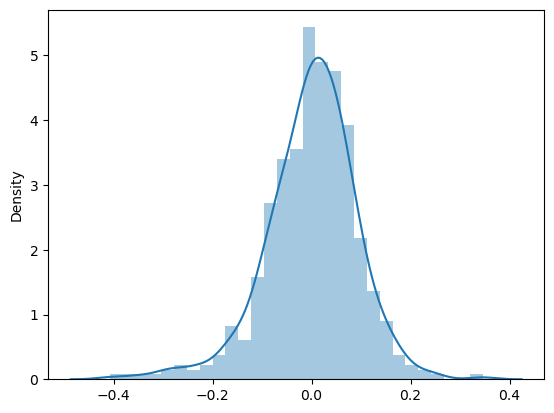

In [75]:
sns.distplot(train_residual)
plt.show()

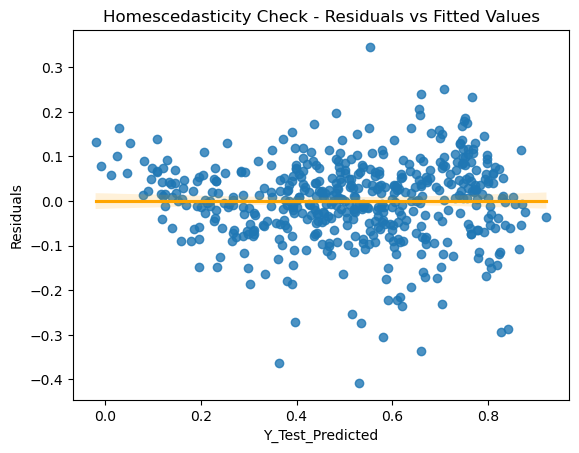

In [109]:
sns.regplot(y_train_pred, train_residual, line_kws={"color":"Orange"})
plt.title('Homescedasticity Check - Residuals vs Fitted Values')
plt.xlabel('Y_Test_Predicted')
plt.ylabel('Residuals')
plt.show()

#### INSIGHTS
- The Residual Analysis show the Residuals form a Normal Distribution. 
- The Mean of the distribution passes through the value 0.0.
- The Final value of R-squared: 0.834 ==> this model can be a good fit for the data with a 83.4% confidence.



### Predicting the Model

**Steps performed on the train dataset:**

- *Scaling the Test Dataset:*
    - The Column names stored in the variable **'numeric_variables'** are scaled.
    - The MinMaxScaler used for this process is initialized via the variable **'min_max_scaler_train'**

- *Prepare the X_test and y_test datasets:*
    - The Dependent variable **'total_counts'** needs to be separated from the **'df_test'** dataset so as to split the dataset to dependent and independent variable sets for analysis; *X_test and y_test respectivily.*
    
- *Predict the y values using the model:*
    - The recent model **rfe_model_06** shows a good fit. The model can be used via the variable **'train_lr_model'**.
    - Predict the results and store in *y_pred*.

- *Evaluate the Model:*
    - Compute the R-Square value using the SKLearn.metrics.r2_score libarary function to evaluate how well the model is fitting to the given dataset.

**Scaling the test Dataset**

In [76]:
df_test.shape #Testing Dataset
# min_max_scaler_train --> Scaler Model used for Training.
# numeric_variables --> numeric variables for scaling

(220, 30)

In [77]:
# Scaling the Test Dataset
numeric_variables

['temp', 'feel_temp', 'humidity', 'windspeed', 'total_count']

In [78]:
df_test.head()

,year,holiday,workingday,temp,feel_temp,humidity,windspeed,total_count,2_Summer,3_Fall,...,03_Mar,04_Apr,05_May,06_Jun,07_Jul,08_Aug,09_Sep,10_Oct,11_Nov,12_Dec
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,1,0,0,0,0,0,0


In [79]:
df_test[numeric_variables] = min_max_scaler_train.transform(df_test[numeric_variables])
df_test.describe()

,year,holiday,workingday,temp,feel_temp,humidity,windspeed,total_count,2_Summer,3_Fall,...,03_Mar,04_Apr,05_May,06_Jun,07_Jul,08_Aug,09_Sep,10_Oct,11_Nov,12_Dec
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Few values' max(values) is not set to 1; the reason is, the min_max_scalar_train is a model fit for the training dataset. It is used to transform the test dataset.

**Prepare the Independent and Dependent variables**

In [80]:
y_test = df_test.pop('total_count')
X_test = df_test

print("Testing Dataset Independent Variable set Shape: ", X_test.shape)
print("Testing Dataset Dependent Variable set Shape: ", y_test.shape)

Testing Dataset Independent Variable set Shape:  (220, 29)
Testing Dataset Dependent Variable set Shape:  (220,)


In [81]:
X_test.head()

,year,holiday,workingday,temp,feel_temp,humidity,windspeed,2_Summer,3_Fall,4_Winter,...,03_Mar,04_Apr,05_May,06_Jun,07_Jul,08_Aug,09_Sep,10_Oct,11_Nov,12_Dec
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,1,0,0,0,0,0,0


**Predict the y values using the model:**

In [82]:
# filtering the test set to match the variables
X_test = X_test[train_model_columns]
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(220, 11)

In [83]:

X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      220 non-null    float64
 1   year       220 non-null    int64  
 2   holiday    220 non-null    int64  
 3   temp       220 non-null    float64
 4   windspeed  220 non-null    float64
 5   2_Summer   220 non-null    uint8  
 6   4_Winter   220 non-null    uint8  
 7   2_Mist     220 non-null    uint8  
 8   3_Snow     220 non-null    uint8  
 9   08_Aug     220 non-null    uint8  
 10  09_Sep     220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [84]:
y_test_pred = train_lr_model.predict(X_test_sm)
y_test_pred.head()

184    0.370711
535    0.907790
299    0.401497
221    0.590123
152    0.574274
dtype: float64

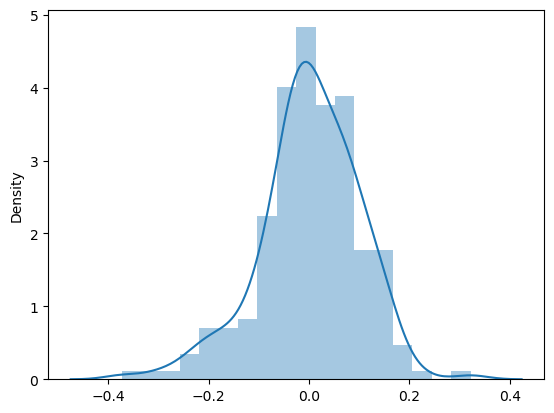

In [85]:
test_residuals = y_test- y_test_pred
sns.distplot(test_residuals)
plt.show()

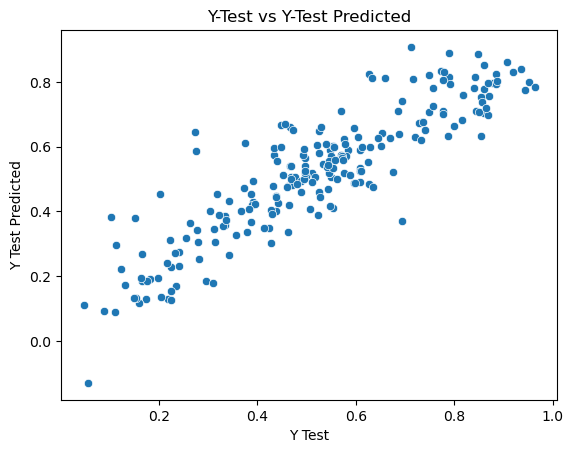

In [97]:
sns.scatterplot(y_test, y_test_pred)
plt.title('Y-Test vs Y-Test Predicted')
plt.xlabel('Y Test')
plt.ylabel('Y Test Predicted')
plt.show()

### Evaluate the Model

**Calculate the R-Square value using SKLearn**

In [87]:
# Evaluate the Model
from sklearn.metrics import r2_score

In [88]:
round(r2_score(y_true=y_test, y_pred=y_test_pred), 3)

0.794

In [89]:
train_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.62e-187
Time:                        02:32:22   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1307      0.017      7.837      0.000       0.098       0.163
year           0.2326      0.008     28.191      0.000       0.216       0.249
holiday       -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp           0.5173      0.022     23.546      0.000       0.474       0.561
windspeed     -0.1497      0.025     -5.950      0.000      -0.199      -0.100
2_Summer       0.1012      0.011      9.116      0.000       0.079       0.123
4_Winter       0.1371      0.011     12.843      0.000       0.116       0.158
2_Mist        -0.0811      0.009     -9.200      0.000      -0.098      -0.064
3_Snow        -0.2819      0.025    -11.361      0.000      -0.331      -0.233
08_Aug         0.0541      0.017      3.249      0.001       0.021       0.087
09_Sep         0.1163      0.017      7.046      0.000       0.084       0.149
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
train_model_columns

Index(['year', 'holiday', 'temp', 'windspeed', '2_Summer', '4_Winter',
       '2_Mist', '3_Snow', '08_Aug', '09_Sep'],
      dtype='object')

## Insights for BIkeSharing

- The Variables year, holiday, temperature, windspeed, 2_summer, 4_winter, 2_mist, 3_snow, 08_Aug, 09_sep are the independent variables used to predict the dependent variable total_counts. 

- The R2 value of 79% explains that the model is a good fit for the unseen data.
The model is able to predict the total_counts 
- Referring the coefficients, we can infer the following:

    
    - There seems to be a +ve increase in the counts of BikeSharing in the year 2019 when compared to 2018.
    - There is a decrease of BikeSharing during the holidays.
    - There seems to be a +ve increase in the BikeSharing during good temperatures. 
    - There seems to be a -ve impact of windspeed for the BikeSharing. i.e., the BikeSharing is less observed when the windspeed is more (given the case rest all the factors are constant).
    - Winter and Summer seasons show a +ve trend for the BikeSharing.
    - The Mist and Snow weathers result in a -ve trend for the BikeSharing.
    - The months August and September turned up to be having a good business for BikeSharing..

In [ ]:
#HERERO

p = sns.scatterplot(y_test_pred)